In [1]:
%pip install completejourney_py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 16.7 MB/s eta 0:00:00


In [2]:
from completejourney_py import get_data

transactions = get_data()["transactions"]
promotions = get_data()["promotions"]
products = get_data()["products"]
demographics = get_data()["demographics"]
coupons = get_data()["coupons"]
coupon_redemptions = get_data()["coupon_redemptions"]
campaigns = get_data()["campaigns"]
campaign_descriptions = get_data()["campaign_descriptions"]

In [3]:
import pandas as pd
import numpy as np

In [4]:
import datetime as dt
transactions['date'] = pd.to_datetime(transactions['transaction_timestamp'])
transactions['date'] = transactions['date'].dt.date.astype('datetime64')
transactions

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,date
0,900,330,31198570044,1095275,1,0.50,0.00,0.0,0.0,1,2017-01-01 11:53:26,2017-01-01
1,900,330,31198570047,9878513,1,0.99,0.10,0.0,0.0,1,2017-01-01 12:10:28,2017-01-01
2,1228,406,31198655051,1041453,1,1.43,0.15,0.0,0.0,1,2017-01-01 12:26:30,2017-01-01
3,906,319,31198705046,1020156,1,1.50,0.29,0.0,0.0,1,2017-01-01 12:30:27,2017-01-01
4,906,319,31198705046,1053875,2,2.78,0.80,0.0,0.0,1,2017-01-01 12:30:27,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1469302,679,447,41453103606,14025548,1,0.79,0.20,0.0,0.0,53,2018-01-01 03:50:03,2018-01-01
1469303,2070,311,41453083334,909894,1,1.73,0.17,0.0,0.0,53,2018-01-01 04:01:20,2018-01-01
1469304,2070,311,41453083334,933067,2,5.00,2.98,0.0,0.0,53,2018-01-01 04:01:20,2018-01-01
1469305,2070,311,41453083334,1029743,1,2.60,0.29,0.0,0.0,53,2018-01-01 04:01:20,2018-01-01


In [5]:
def classify(row):
    if (row['household_comp'] == "1 Adult Kids") and (row['income'] in ["Under 15K", "15-24K", "25-34K", "35-49K"]):
        return "low"
    elif (row['household_comp'] == "1 Adult Kids") and (row['income'] in ["50-74K", "75-99K", "100-124K", "125-149K"]):
        return "middle"
    elif (row['household_comp'] == "1 Adult Kids") and (row['income'] in ["150-174K", "175-199K", "200-249K", "250K+"]):
        return "high"
    elif (row['household_comp'] == "1 Adult No Kids") and (row['income'] in ["Under 15K", "15-24K", "25-34K"]):
        return "low"
    elif (row['household_comp'] == "1 Adult No Kids") and (row['income'] in ["35-49K", "50-74K", "75-99K"]):
        return "middle"
    elif (row['household_comp'] == "1 Adult No Kids") and (row['income'] in ["100-124K", "125-149K", "150-174K", "175-199K", "200-249K", "250K+"]):
        return "high"
    elif (row['household_comp'] == "2 Adults Kids") and (row['income'] in ["Under 15K", "15-24K", "25-34K", "35-49K", "50-74K"]):
        return "low"
    elif (row['household_comp'] == "2 Adults Kids") and (row['income'] in ["75-99K", "100-124K", "125-149K", "150-174K", "175-199K"]):
        return "middle"
    elif (row['household_comp'] == "2 Adults Kids") and (row['income'] in ["200-249K", "250K+"]):
        return "high"
    elif (row['household_comp'] == "2 Adults No Kids") and (row['income'] in ["Under 15K", "15-24K", "25-34K", "35-49K"]):
        return "low"
    elif (row['household_comp'] == "2 Adults No Kids") and (row['income'] in ["50-74K", "75-99K", "100-124K"]):
        return "middle"
    elif (row['household_comp'] == "2 Adults No Kids") and (row['income'] in ["125-149K", "150-174K", "175-199K", "200-249K", "250K+"]):
        return "high"
    else:
        return "other"

demographics['class'] = demographics.apply(classify, axis=1)
demographics

,household_id,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,class
0,1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0,low
1,1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0,middle
2,1003,35-44,25-34K,None,Unmarried,1,1 Adult No Kids,0,low
3,1004,25-34,15-24K,None,Unmarried,1,1 Adult No Kids,0,low
4,101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2,low
...,...,...,...,...,...,...,...,...,...
796,986,25-34,35-49K,None,Unmarried,1,1 Adult No Kids,0,middle
797,992,45-54,35-49K,Homeowner,Married,3,2 Adults Kids,1,low
798,993,55-64,50-74K,Homeowner,Married,5+,1 Adult Kids,3+,middle
799,996,55-64,25-34K,Homeowner,Married,2,2 Adults No Kids,0,low


In [6]:
low_id=demographics.loc[demographics['class']=='low']['household_id'].tolist()
mid_id=demographics.loc[demographics['class']=='middle']['household_id'].tolist()
high_id=demographics.loc[demographics['class']=='high']['household_id'].tolist()

In [7]:
high_transactions=transactions.loc[transactions['household_id'].isin(high_id)]
high_transactions
high_redemptions=coupon_redemptions.loc[coupon_redemptions['household_id'].isin(high_id)]

In [8]:
high_trans_count=[]
for i in high_transactions['date'].unique():
  high_trans_count.append(len(high_transactions.loc[high_transactions['date']==i]))
print(high_trans_count)

[87, 302, 444, 362, 154, 180, 313, 74, 210, 242, 322, 276, 205, 227, 305, 490, 239, 154, 122, 403, 233, 378, 355, 307, 330, 139, 187, 302, 392, 245, 344, 230, 190, 251, 509, 268, 169, 157, 207, 333, 282, 304, 231, 287, 193, 182, 298, 153, 222, 219, 301, 228, 220, 102, 164, 224, 227, 133, 264, 351, 214, 193, 136, 456, 242, 114, 308, 250, 245, 381, 220, 374, 132, 351, 153, 267, 185, 159, 341, 198, 153, 156, 259, 313, 319, 217, 269, 137, 220, 190, 241, 235, 271, 262, 201, 188, 154, 148, 300, 352, 275, 149, 164, 393, 192, 98, 255, 322, 311, 155, 177, 236, 355, 322, 238, 336, 104, 302, 127, 215, 354, 303, 81, 298, 292, 171, 268, 219, 335, 210, 177, 303, 84, 216, 399, 257, 181, 205, 258, 206, 394, 220, 275, 295, 91, 252, 290, 231, 284, 243, 132, 295, 223, 198, 344, 282, 155, 198, 229, 250, 168, 250, 178, 292, 101, 138, 195, 114, 475, 159, 227, 322, 116, 165, 329, 139, 76, 72, 220, 176, 401, 205, 313, 261, 416, 160, 164, 136, 214, 312, 185, 282, 175, 280, 214, 327, 269, 214, 188, 102, 225, 15

In [9]:
high_redp_count=[]
for i in high_transactions['date'].unique():
  high_redp_count.append(len(high_redemptions.loc[high_redemptions['redemption_date']==i]))
print(high_redp_count)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 6, 3, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 5, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 5, 1, 0, 2, 0, 2, 4, 1, 0, 0, 0, 1, 0, 1, 1, 0, 7, 0, 0, 1, 0, 0, 5, 0, 0,

In [10]:
from operator import truediv
high_redp_rate=list(map(truediv, high_redp_count, high_trans_count))

In [11]:
high_transaction_ts=pd.DataFrame({'date':high_transactions['date'].unique(),'rate':high_redp_rate})
high_transaction_ts['rate']=high_transaction_ts['rate']*100

In [12]:
high_transaction_ts

,date,rate
0,2017-01-01,0.000000
1,2017-01-02,0.000000
2,2017-01-03,0.000000
3,2017-01-04,0.000000
4,2017-01-05,0.000000
...,...,...
360,2017-12-28,1.648352
361,2017-12-29,0.000000
362,2017-12-30,0.000000
363,2017-12-31,0.000000


In [13]:
high_transaction_ts.drop(high_transaction_ts.tail(1).index,inplace=True)
high_transaction_ts

,date,rate
0,2017-01-01,0.000000
1,2017-01-02,0.000000
2,2017-01-03,0.000000
3,2017-01-04,0.000000
4,2017-01-05,0.000000
...,...,...
359,2017-12-27,0.000000
360,2017-12-28,1.648352
361,2017-12-29,0.000000
362,2017-12-30,0.000000


In [14]:
#transform into time series data
high_trans_ts=high_transaction_ts.copy()
high_trans_ts['date'] = pd.to_datetime(high_trans_ts['date'], format='%Y%M%D')
print(high_trans_ts.head())

        date  rate
0 2017-01-01   0.0
1 2017-01-02   0.0
2 2017-01-03   0.0
3 2017-01-04   0.0
4 2017-01-05   0.0


In [15]:
high_trans_ts.index = high_trans_ts['date']
del high_trans_ts['date']
print(high_trans_ts.head())

            rate
date            
2017-01-01   0.0
2017-01-02   0.0
2017-01-03   0.0
2017-01-04   0.0
2017-01-05   0.0


In [16]:
high_trans_ts

,rate
date,
2017-01-01,0.000000
2017-01-02,0.000000
2017-01-03,0.000000
2017-01-04,0.000000
2017-01-05,0.000000
...,...
2017-12-27,0.000000
2017-12-28,1.648352
2017-12-29,0.000000


In [17]:
high_trans_ts.resample('1D').mean()

,rate
date,
2017-01-01,0.000000
2017-01-02,0.000000
2017-01-03,0.000000
2017-01-04,0.000000
2017-01-05,0.000000
...,...
2017-12-27,0.000000
2017-12-28,1.648352
2017-12-29,0.000000


In [18]:
high_trans_ts_fill = high_trans_ts.resample('1D').mean().interpolate()
high_trans_ts_fill

,rate
date,
2017-01-01,0.000000
2017-01-02,0.000000
2017-01-03,0.000000
2017-01-04,0.000000
2017-01-05,0.000000
...,...
2017-12-27,0.000000
2017-12-28,1.648352
2017-12-29,0.000000


Text(0.5, 1.0, 'Redemption rate for high income households')

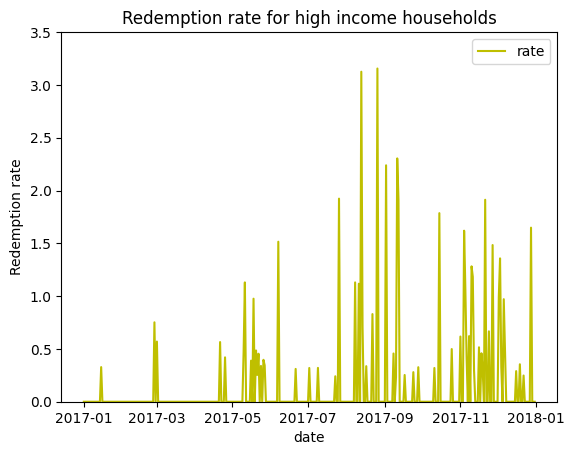

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(high_trans_ts_fill,palette=['y'])
plt.ylabel('Redemption rate')
plt.ylim(0,3.5)
plt.title('Redemption rate for high income households')

In [20]:
high_trans_ts_fill.sort_values(by='rate')

,rate
date,
2017-01-01,0.000000
2017-08-12,0.000000
2017-08-10,0.000000
2017-08-09,0.000000
2017-08-07,0.000000
...,...
2017-07-26,1.923077
2017-09-02,2.238806
2017-09-11,2.304147


In [21]:
day_1=coupon_redemptions.loc[coupon_redemptions['redemption_date']=='2017-08-26']
house_1=day_1.loc[day_1['household_id'].isin(high_id)]

In [22]:
house_1

,household_id,coupon_upc,campaign_id,redemption_date
936,1197,10000085429,13,2017-08-26
937,1197,50308412076,13,2017-08-26
938,1197,50813790076,13,2017-08-26
939,1197,51600070033,13,2017-08-26
940,1197,51980010075,13,2017-08-26
941,1197,52740022050,13,2017-08-26
942,1197,52840050076,13,2017-08-26
943,1197,53700040075,13,2017-08-26
944,1197,54300020076,13,2017-08-26
945,1197,55410000076,13,2017-08-26


In [23]:
trans_1=transactions.loc[np.where((transactions['date']=='2017-08-26') & (transactions['household_id']==1197))]
trans_1

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,date
956922,1197,384,35464052709,820560,1,0.60,0.19,0.0,0.0,35,2017-08-26 19:10:05,2017-08-26
956923,1197,384,35464052709,821344,1,1.65,0.00,0.0,0.0,35,2017-08-26 19:10:05,2017-08-26
956924,1197,384,35464052709,822346,1,1.65,0.00,0.0,0.0,35,2017-08-26 19:10:05,2017-08-26
956925,1197,384,35464052709,825618,1,0.60,0.19,0.0,0.0,35,2017-08-26 19:10:05,2017-08-26
956926,1197,384,35464052709,826952,1,2.50,0.49,1.0,0.0,35,2017-08-26 19:10:05,2017-08-26
...,...,...,...,...,...,...,...,...,...,...,...,...
957003,1197,384,35464052709,13381584,1,2.89,1.00,1.0,0.0,35,2017-08-26 19:10:05,2017-08-26
957004,1197,384,35464052709,13842214,1,1.99,0.00,0.0,0.0,35,2017-08-26 19:10:05,2017-08-26
957005,1197,384,35464052709,14024904,1,3.19,0.00,0.0,0.0,35,2017-08-26 19:10:05,2017-08-26
957006,1197,384,35464052709,15511302,1,1.50,0.09,0.0,0.0,35,2017-08-26 19:10:05,2017-08-26


In [24]:
product_1=pd.DataFrame()
for i in trans_1['product_id'].unique().tolist():
  cur=products[products['product_id']==i]
  product_1=pd.concat([product_1,cur]) #product_1.append(cur)
product_1

,product_id,manufacturer_id,department,brand,product_category,product_type,package_size
5978,820560,1487,GROCERY,National,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ
6062,821344,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,FRUIT SNACKS,5.4 OZ
6190,822346,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,FRUIT SNACKS,N 5.4 OZ
6594,825618,1487,GROCERY,National,YOGURT,YOGURT NOT MULTI-PACKS,4 OZ
6755,826952,1318,GROCERY,National,PICKLE/RELISH/PKLD VEG,PICKLES,24 OZ
...,...,...,...,...,...,...,...
82598,13381584,1315,GROCERY,National,BATH TISSUES,TOILET TISSUE,None
84391,13842214,1720,DRUG GM,National,MAGAZINE,TV/MOVIE-MAGAZINE,None
85376,14024904,5103,DRUG GM,National,HAIR CARE PRODUCTS,HAIR CONDITIONERS AND RINSES,None
86566,15511302,69,GROCERY,Private,BAKED BREAD/BUNS/ROLLS,DIET/LIGHT BREAD,16 OZ


In [25]:
product_1.head(15)

,product_id,manufacturer_id,department,brand,product_category,product_type,package_size
5978,820560,1487,GROCERY,National,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ
6062,821344,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,FRUIT SNACKS,5.4 OZ
6190,822346,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,FRUIT SNACKS,N 5.4 OZ
6594,825618,1487,GROCERY,National,YOGURT,YOGURT NOT MULTI-PACKS,4 OZ
6755,826952,1318,GROCERY,National,PICKLE/RELISH/PKLD VEG,PICKLES,24 OZ
7878,836758,1046,GROCERY,National,MISC. DAIRY,REFRIGERATED PUDDING,24 OZ
9861,853887,2833,MEAT,National,BEEF,NATURAL BEEF,None
10129,856435,317,GROCERY,National,CHEESE,CREAM CHEESE,8 OZ
10818,862538,2209,MEAT-PCKGD,National,BREAKFAST SAUSAGE/SANDWICHES,LINKS - RAW,12 OZ
11164,865501,1305,GROCERY,National,CRACKERS/MISC BKD FD,SOUP CRACKERS (SALTINE/OYSTER),6 OZ


In [26]:
product_1['product_type'].unique()

array(['YOGURT NOT MULTI-PACKS', 'FRUIT SNACKS', 'PICKLES',
       'REFRIGERATED PUDDING', 'NATURAL BEEF', 'CREAM CHEESE',
       'LINKS - RAW', 'SOUP CRACKERS (SALTINE/OYSTER)', 'PREMIUM',
       'GRAPES WHITE', 'SWEET GOODS - FULL SIZE', 'SOFT DRINK CANISTERS',
       'CHEESE CRACKERS (CHEEZ-ITS/GOL', 'TOOTHPASTE',
       'MAINSTREAM WHITE BREAD', 'MEXICAN DINNERS AND FOODS',
       'MEAT INCLUDED', 'PREMIUM - MEAT', 'REFRIGERATED SPECILATY ROLLS',
       'TORTILLA/NACHO CHIPS', 'KOSHER/SPECIALTY',
       'MARGARINE: TUBS AND BOWLS', 'MEAT: SAUS DRY BULK',
       'MOLASSES & SYRUPS', 'ENGLISH MUFFINS/WAFFLES', 'KIWI FRUIT',
       'SPECIALTY COOKIES', 'CHEESE: NATURAL BULK', 'MICROWAVABLE CUPS',
       'KIDS CEREAL', 'DIPS (NON-REFRIGERATED)',
       'MOUTHWASH RINSES AND SPRAYS', 'MEXICAN SAUCESSALSAPICANTEE',
       'ORGANIC TROPICAL FRUIT', 'SMOKED/COOKED',
       'FRUIT COCKTAIL FRUIT SALAD', 'FLUID MILK WHITE ONLY', 'PRETZELS',
       'ALKALINE BATTERIES', 'GLASS CLEANERS', 'PIN

In [27]:
mid_transactions=transactions.loc[transactions['household_id'].isin(mid_id)]
mid_redemptions=coupon_redemptions.loc[coupon_redemptions['household_id'].isin(mid_id)]

In [28]:
mid_trans_count=[]
for i in mid_transactions['date'].unique():
  mid_trans_count.append(len(mid_transactions.loc[mid_transactions['date']==i]))
print(mid_trans_count)

[884, 878, 808, 848, 1036, 779, 1538, 1602, 889, 623, 729, 764, 885, 1571, 1101, 1114, 911, 670, 613, 987, 1054, 1483, 1065, 699, 808, 786, 807, 1210, 1580, 992, 832, 826, 908, 932, 1470, 1198, 765, 754, 723, 951, 1076, 1360, 1591, 636, 965, 779, 698, 834, 1101, 1179, 888, 1072, 926, 1181, 807, 1519, 1627, 1052, 782, 776, 1043, 897, 1270, 1229, 956, 731, 700, 684, 875, 1067, 1672, 771, 926, 810, 819, 941, 1176, 1208, 1237, 965, 807, 574, 1244, 1521, 1393, 816, 964, 642, 904, 814, 1409, 1410, 778, 890, 925, 837, 892, 1476, 1369, 1093, 613, 775, 1260, 967, 1596, 887, 1005, 971, 849, 844, 915, 1161, 1318, 938, 1126, 936, 728, 997, 990, 1434, 1100, 1209, 921, 878, 857, 1284, 1591, 1060, 836, 805, 881, 1203, 1123, 1326, 1061, 849, 843, 1221, 1091, 1240, 1484, 1020, 1056, 725, 886, 1226, 1319, 867, 1158, 641, 889, 1059, 1052, 1431, 1562, 983, 809, 771, 914, 764, 1130, 1536, 984, 1059, 913, 1085, 1088, 954, 1336, 866, 949, 589, 671, 813, 1300, 1138, 1176, 676, 574, 1046, 953, 1384, 1046, 1070

In [29]:
mid_redp_count=[]
for i in mid_transactions['date'].unique():
  mid_redp_count.append(len(mid_redemptions.loc[mid_redemptions['redemption_date']==i]))
print(mid_redp_count)

[0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 3, 0, 2, 1, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 7, 6, 10, 4, 4, 5, 2, 5, 0, 14, 1, 1, 8, 7, 3, 5, 3, 1, 3, 1, 7, 4, 1, 11, 4, 0, 0, 5, 4, 5, 3, 4, 2, 3, 1, 1, 5, 0, 2, 0, 0, 1, 1, 1, 4, 3, 0, 0, 4, 4, 0, 1, 0, 1, 3, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 21, 15, 7, 10, 6, 9, 4, 4, 12, 6, 23, 14, 8, 1, 0, 6, 6, 9, 15, 1, 5, 3, 5, 13, 9, 0, 5, 4, 8, 0, 10, 3, 2, 1, 3, 7, 5, 2, 4, 4, 9, 0, 0, 2, 2, 5, 5, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 6, 0, 3, 1, 2, 1, 1, 5, 1, 4, 7, 29, 23, 1, 4, 19, 5, 7, 6, 10, 15, 2, 9, 10, 9, 18, 8, 6, 8, 6, 0,

In [30]:
from operator import truediv
mid_redp_rate=list(map(truediv, mid_redp_count, mid_trans_count))

In [31]:
mid_transaction_ts=pd.DataFrame({'date':mid_transactions['date'].unique(),'rate':mid_redp_rate})
mid_transaction_ts['rate']=mid_transaction_ts['rate']*100

In [32]:
mid_transaction_ts

,date,rate
0,2017-01-01,0.000000
1,2017-01-02,0.000000
2,2017-01-03,0.000000
3,2017-01-04,0.000000
4,2017-01-05,0.000000
...,...,...
360,2017-12-28,0.000000
361,2017-12-29,0.268336
362,2017-12-30,0.132188
363,2017-12-31,0.000000


In [33]:
mid_transaction_ts.drop(mid_transaction_ts.tail(1).index,inplace=True)
mid_transaction_ts

,date,rate
0,2017-01-01,0.000000
1,2017-01-02,0.000000
2,2017-01-03,0.000000
3,2017-01-04,0.000000
4,2017-01-05,0.000000
...,...,...
359,2017-12-27,0.000000
360,2017-12-28,0.000000
361,2017-12-29,0.268336
362,2017-12-30,0.132188


In [34]:
#transform into time series data
mid_trans_ts=mid_transaction_ts.copy()
mid_trans_ts['date'] = pd.to_datetime(mid_trans_ts['date'], format='%Y%M%D')
print(mid_trans_ts.head())

        date  rate
0 2017-01-01   0.0
1 2017-01-02   0.0
2 2017-01-03   0.0
3 2017-01-04   0.0
4 2017-01-05   0.0


In [35]:
mid_trans_ts.index = mid_trans_ts['date']
del mid_trans_ts['date']
print(mid_trans_ts.head())

            rate
date            
2017-01-01   0.0
2017-01-02   0.0
2017-01-03   0.0
2017-01-04   0.0
2017-01-05   0.0


In [36]:
mid_trans_ts

,rate
date,
2017-01-01,0.000000
2017-01-02,0.000000
2017-01-03,0.000000
2017-01-04,0.000000
2017-01-05,0.000000
...,...
2017-12-27,0.000000
2017-12-28,0.000000
2017-12-29,0.268336


In [37]:
mid_trans_ts.resample('1D').mean()

,rate
date,
2017-01-01,0.000000
2017-01-02,0.000000
2017-01-03,0.000000
2017-01-04,0.000000
2017-01-05,0.000000
...,...
2017-12-27,0.000000
2017-12-28,0.000000
2017-12-29,0.268336


In [38]:
mid_trans_ts_fill = mid_trans_ts.resample('1D').mean().interpolate()
mid_trans_ts_fill

,rate
date,
2017-01-01,0.000000
2017-01-02,0.000000
2017-01-03,0.000000
2017-01-04,0.000000
2017-01-05,0.000000
...,...
2017-12-27,0.000000
2017-12-28,0.000000
2017-12-29,0.268336


Text(0.5, 1.0, 'Redemption rate for middle income households')

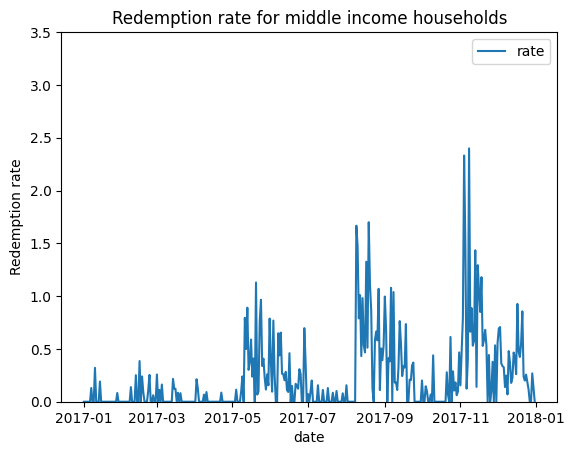

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(mid_trans_ts_fill)
plt.ylabel('Redemption rate')
plt.ylim(0,3.5)
plt.title('Redemption rate for middle income households')

In [40]:
low_transactions=transactions.loc[transactions['household_id'].isin(low_id)]
low_redemptions=coupon_redemptions.loc[coupon_redemptions['household_id'].isin(low_id)]

In [41]:
low_trans_count=[]
for i in low_transactions['date'].unique():
  low_trans_count.append(len(low_transactions.loc[low_transactions['date']==i]))
print(low_trans_count)

[618, 973, 978, 1119, 1183, 980, 1016, 1552, 992, 979, 859, 809, 918, 981, 860, 987, 954, 789, 661, 802, 1133, 1627, 822, 897, 626, 702, 780, 1044, 1194, 1094, 949, 798, 1116, 959, 1377, 1451, 847, 944, 1040, 637, 1024, 935, 1040, 1043, 899, 746, 769, 866, 1081, 1136, 992, 1053, 1050, 617, 932, 1249, 1458, 789, 667, 900, 899, 1065, 1254, 1431, 946, 751, 732, 981, 900, 832, 1492, 974, 633, 765, 890, 825, 1405, 1628, 1349, 755, 754, 857, 704, 1228, 1418, 1018, 758, 811, 688, 896, 1227, 1308, 1319, 1160, 625, 732, 875, 1048, 1423, 902, 816, 819, 695, 1172, 1422, 864, 829, 879, 852, 926, 719, 1141, 1081, 805, 1005, 813, 641, 826, 1021, 1420, 1274, 833, 953, 886, 697, 1365, 1249, 916, 1047, 1164, 800, 892, 927, 1314, 798, 1033, 1123, 870, 944, 1069, 1177, 902, 777, 845, 723, 949, 1072, 1182, 1094, 806, 908, 773, 1149, 1281, 1256, 1106, 1244, 951, 660, 1050, 956, 1227, 972, 897, 794, 1232, 765, 1045, 1220, 953, 835, 826, 1037, 756, 910, 977, 985, 1052, 895, 925, 1065, 1247, 1266, 1118, 1308,

In [42]:
low_redp_count=[]
for i in low_transactions['date'].unique():
  low_redp_count.append(len(low_redemptions.loc[low_redemptions['redemption_date']==i]))
print(low_redp_count)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 1, 3, 10, 2, 0, 2, 3, 6, 9, 2, 0, 3, 6, 5, 3, 4, 0, 2, 8, 0, 5, 1, 1, 8, 1, 2, 3, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 4, 0, 0, 2, 0, 3, 0, 7, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 2, 3, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 8, 8, 8, 1, 6, 1, 1, 9, 4, 14, 10, 8, 3, 2, 5, 3, 4, 1, 3, 6, 1, 5, 2, 4, 3, 4, 9, 0, 9, 1, 0, 9, 1, 0, 0, 0, 2, 2, 0, 4, 3, 2, 0, 1, 5, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 10, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 10, 21, 1, 10, 4, 7, 2, 9, 6, 8, 22, 2, 0, 8, 1, 6, 10, 2, 16, 0, 3, 1, 0, 2, 8,

In [43]:
from operator import truediv
low_redp_rate=list(map(truediv, low_redp_count, low_trans_count))

In [44]:
low_transaction_ts=pd.DataFrame({'date':low_transactions['date'].unique(),'rate':low_redp_rate})
low_transaction_ts['rate']=low_transaction_ts['rate']*100

In [45]:
low_transaction_ts

,date,rate
0,2017-01-01,0.000000
1,2017-01-02,0.000000
2,2017-01-03,0.102249
3,2017-01-04,0.000000
4,2017-01-05,0.000000
...,...,...
360,2017-12-28,0.411100
361,2017-12-29,0.099206
362,2017-12-30,0.000000
363,2017-12-31,0.072359


In [46]:
low_transaction_ts.drop(low_transaction_ts.tail(1).index,inplace=True)
low_transaction_ts

,date,rate
0,2017-01-01,0.000000
1,2017-01-02,0.000000
2,2017-01-03,0.102249
3,2017-01-04,0.000000
4,2017-01-05,0.000000
...,...,...
359,2017-12-27,0.000000
360,2017-12-28,0.411100
361,2017-12-29,0.099206
362,2017-12-30,0.000000


In [47]:
#transform into time series data
low_trans_ts=low_transaction_ts.copy()
low_trans_ts['date'] = pd.to_datetime(low_trans_ts['date'], format='%Y%M%D')
print(low_trans_ts.head())

        date      rate
0 2017-01-01  0.000000
1 2017-01-02  0.000000
2 2017-01-03  0.102249
3 2017-01-04  0.000000
4 2017-01-05  0.000000


In [48]:
low_trans_ts.index = low_trans_ts['date']
del low_trans_ts['date']
print(low_trans_ts.head())

                rate
date                
2017-01-01  0.000000
2017-01-02  0.000000
2017-01-03  0.102249
2017-01-04  0.000000
2017-01-05  0.000000


In [49]:
low_trans_ts

,rate
date,
2017-01-01,0.000000
2017-01-02,0.000000
2017-01-03,0.102249
2017-01-04,0.000000
2017-01-05,0.000000
...,...
2017-12-27,0.000000
2017-12-28,0.411100
2017-12-29,0.099206


In [50]:
low_trans_ts.resample('1D').mean()

,rate
date,
2017-01-01,0.000000
2017-01-02,0.000000
2017-01-03,0.102249
2017-01-04,0.000000
2017-01-05,0.000000
...,...
2017-12-27,0.000000
2017-12-28,0.411100
2017-12-29,0.099206


In [51]:
low_trans_ts_fill = low_trans_ts.resample('1D').mean().interpolate()
low_trans_ts_fill

,rate
date,
2017-01-01,0.000000
2017-01-02,0.000000
2017-01-03,0.102249
2017-01-04,0.000000
2017-01-05,0.000000
...,...
2017-12-27,0.000000
2017-12-28,0.411100
2017-12-29,0.099206


Text(0.5, 1.0, 'Redemption rate for low income households')

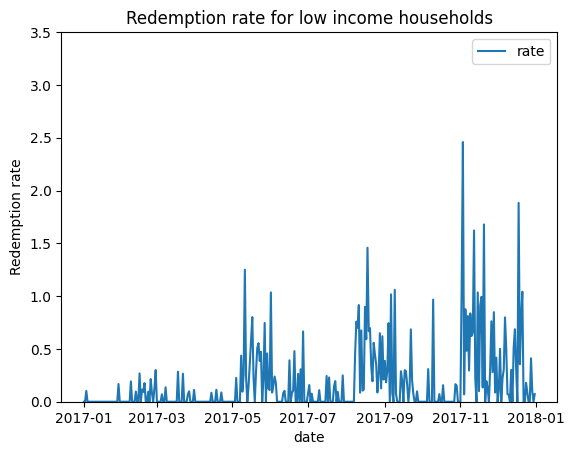

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(low_trans_ts_fill)
plt.ylabel('Redemption rate')
plt.ylim(0,3.5)
plt.title('Redemption rate for low income households')